# PROJECT 1:1027:SKIN DISEASE

In [1]:
#Task 1:-Prepare a complete data analysis report on the given data.

#Task 2:-Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

#Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing


In [3]:
data=pd.read_csv("dermatology.csv")

In [4]:
data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [5]:
data.tail(5)

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [6]:
'''In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.'''

'In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.'

In [7]:
data.shape

(366, 35)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [9]:
# all are non-null values

In [10]:
pd.set_option('display.max_columns', None)
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  family_history  melanin_incontinence  \
count         366.000000      366.000000            366.000000   
mean            0.519126        0.125683              0.404372   
std             0.905639        0.331946              0.869818   
min             0.000000        0.000000              0.000000   
25%             0.000000        0.000000              0.000000   
50%             0.000000        0.000000              0.000000   
75%             1.000000        0.000000              0.000000   
max             3.000000        1.000000              3.000000   

       eosinophils_in_the_infiltrate  PNL_infiltrate  \
count                     366.000000      366.000000   
mean                        0.139344        0.546448   
std                         0.411790        0.815451   
min                         0.000000        0.000000   
25%                         0.000000        0.000000   
50%                         0.000000        0.000000   
75%                         0.000000        1.000000   
max                         2.000000        3.000000   

       fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
count                        366.000000  366.000000  366.000000   
mean                           0.336066    1.368852    1.956284   
std                            0.853139    1.104418    0.712512   
min                            0.000000    0.000000    0.000000   
25%                            0.000000    0.000000    2.000000   
50%                            0.000000    2.000000    2.000000   
75%                            0.000000    2.000000    2.000000   
max                            3.000000    3.000000    3.000000   

       hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
count      366.000000     366.000000                   366.000000   
mean         0.527322       1.289617                     0.663934   
std          0.757116       0.917562                     1.056829   
min          0.000000       0.000000                     0.000000   
25%          0.000000       1.000000                     0.000000   
50%          0.000000       1.000000                     0.000000   
75%          1.000000       2.000000                     2.000000   
max 

In [11]:
#Insights from describe:
#except family_history,eosinophils_in_the_infiltrate and age,all symptoms have ranges between 0 to 3,where 0 is minimum and 3 is maximum.
#eosinophils_in_the_infiltrate  has range from 0 to 2,where 0 is minimum and 2 is maximum.
#in family history,0 is no family history and 1 is positive family history.
#Age:minimum-0 year,maximum-75 year,average-36.2 year.
#class(target_column):range from 1 to 6,minimum is 1,maximum is 6,average is 2.8(~3)

In [12]:
data.describe(include='O')

Age
count   366
unique   61
top      40
freq     17

In [13]:
data['Age'].max() 

'?'

In [14]:
#Age column has a corrupted/nonneumarical data,that is ?
#check the type of Age

In [15]:
def convert_to_median(data):
    numeric_values = pd.to_numeric(data, errors='coerce')
    median = np.median(numeric_values[~np.isnan(numeric_values)])
    data[~pd.to_numeric(data, errors='coerce').notna()] = median
    return data

In [16]:
for Age in data.columns:
    data[Age] = convert_to_median(data[Age])

C:\Users\suchi joshi\AppData\Local\Temp\ipykernel_2608\1854832131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[~pd.to_numeric(data, errors='coerce').notna()] = median


In [17]:
# Convert the 'column_name' to int64 data type
data['Age'] = data['Age'].astype(int)

In [18]:
data.info() #checking Age is converted or not?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

In [19]:
data['Age'].max()

75

In [20]:
data['Age'].min()

0

In [21]:
 data['Age'].unique() #75-max,0-min

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, 35, 15, 46, 62, 48, 12, 52, 60, 32, 19,
       29, 25, 36, 13, 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61, 67,
       56, 53, 24, 58, 49, 63, 68,  9, 75])

In [22]:
data['Age'].value_counts()

35    22
40    17
50    17
27    16
36    16
22    15
55    14
25    14
30    13
33    12
60    11
52    11
42    10
18     9
20     8
34     8
10     7
8      7
62     7
45     7
51     7
46     6
47     6
32     6
19     6
28     5
44     5
56     5
17     5
48     5
16     5
70     4
7      4
43     4
41     4
26     3
21     3
29     3
38     3
23     3
12     3
13     2
65     2
9      2
24     2
53     2
57     2
61     2
37     2
15     2
39     2
31     2
67     1
0      1
64     1
58     1
49     1
63     1
68     1
75     1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

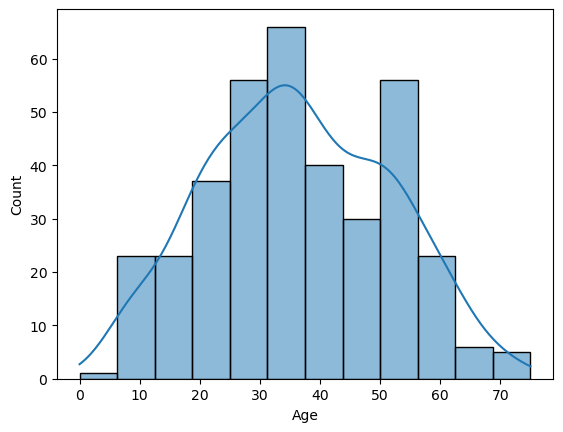

In [23]:
#plt.hist(data.Age,color='green',bins=20,edgecolor='black')
sns.histplot(x=data.Age,kde=True)

In [24]:
# max affected age group between 32-40 year and 50 to 55.

(array([320.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

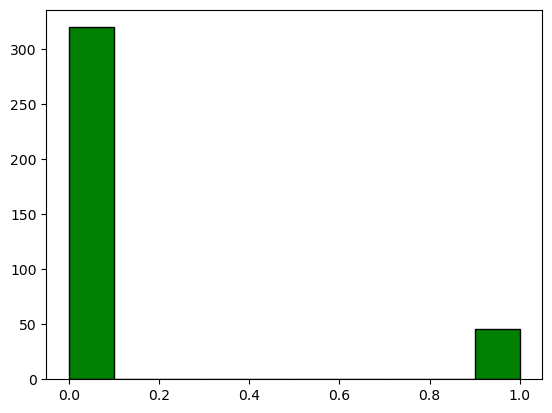

In [25]:
plt.hist(data.family_history,color='green',edgecolor='black')

In [26]:
# there is less chances of disease transformation from family to next generation

In [27]:
data['class'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [28]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

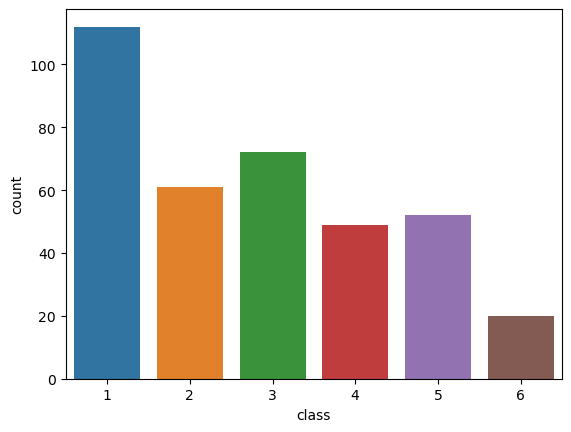

In [29]:
sns.countplot(x='class',data=data,dodge=True)
sns.countplot(x=data['class'])

In [30]:

# maximum cases seen in class 1 (111) then class 3(71),then class 2(60),class 5(48),class 4(48) and class 6(20).

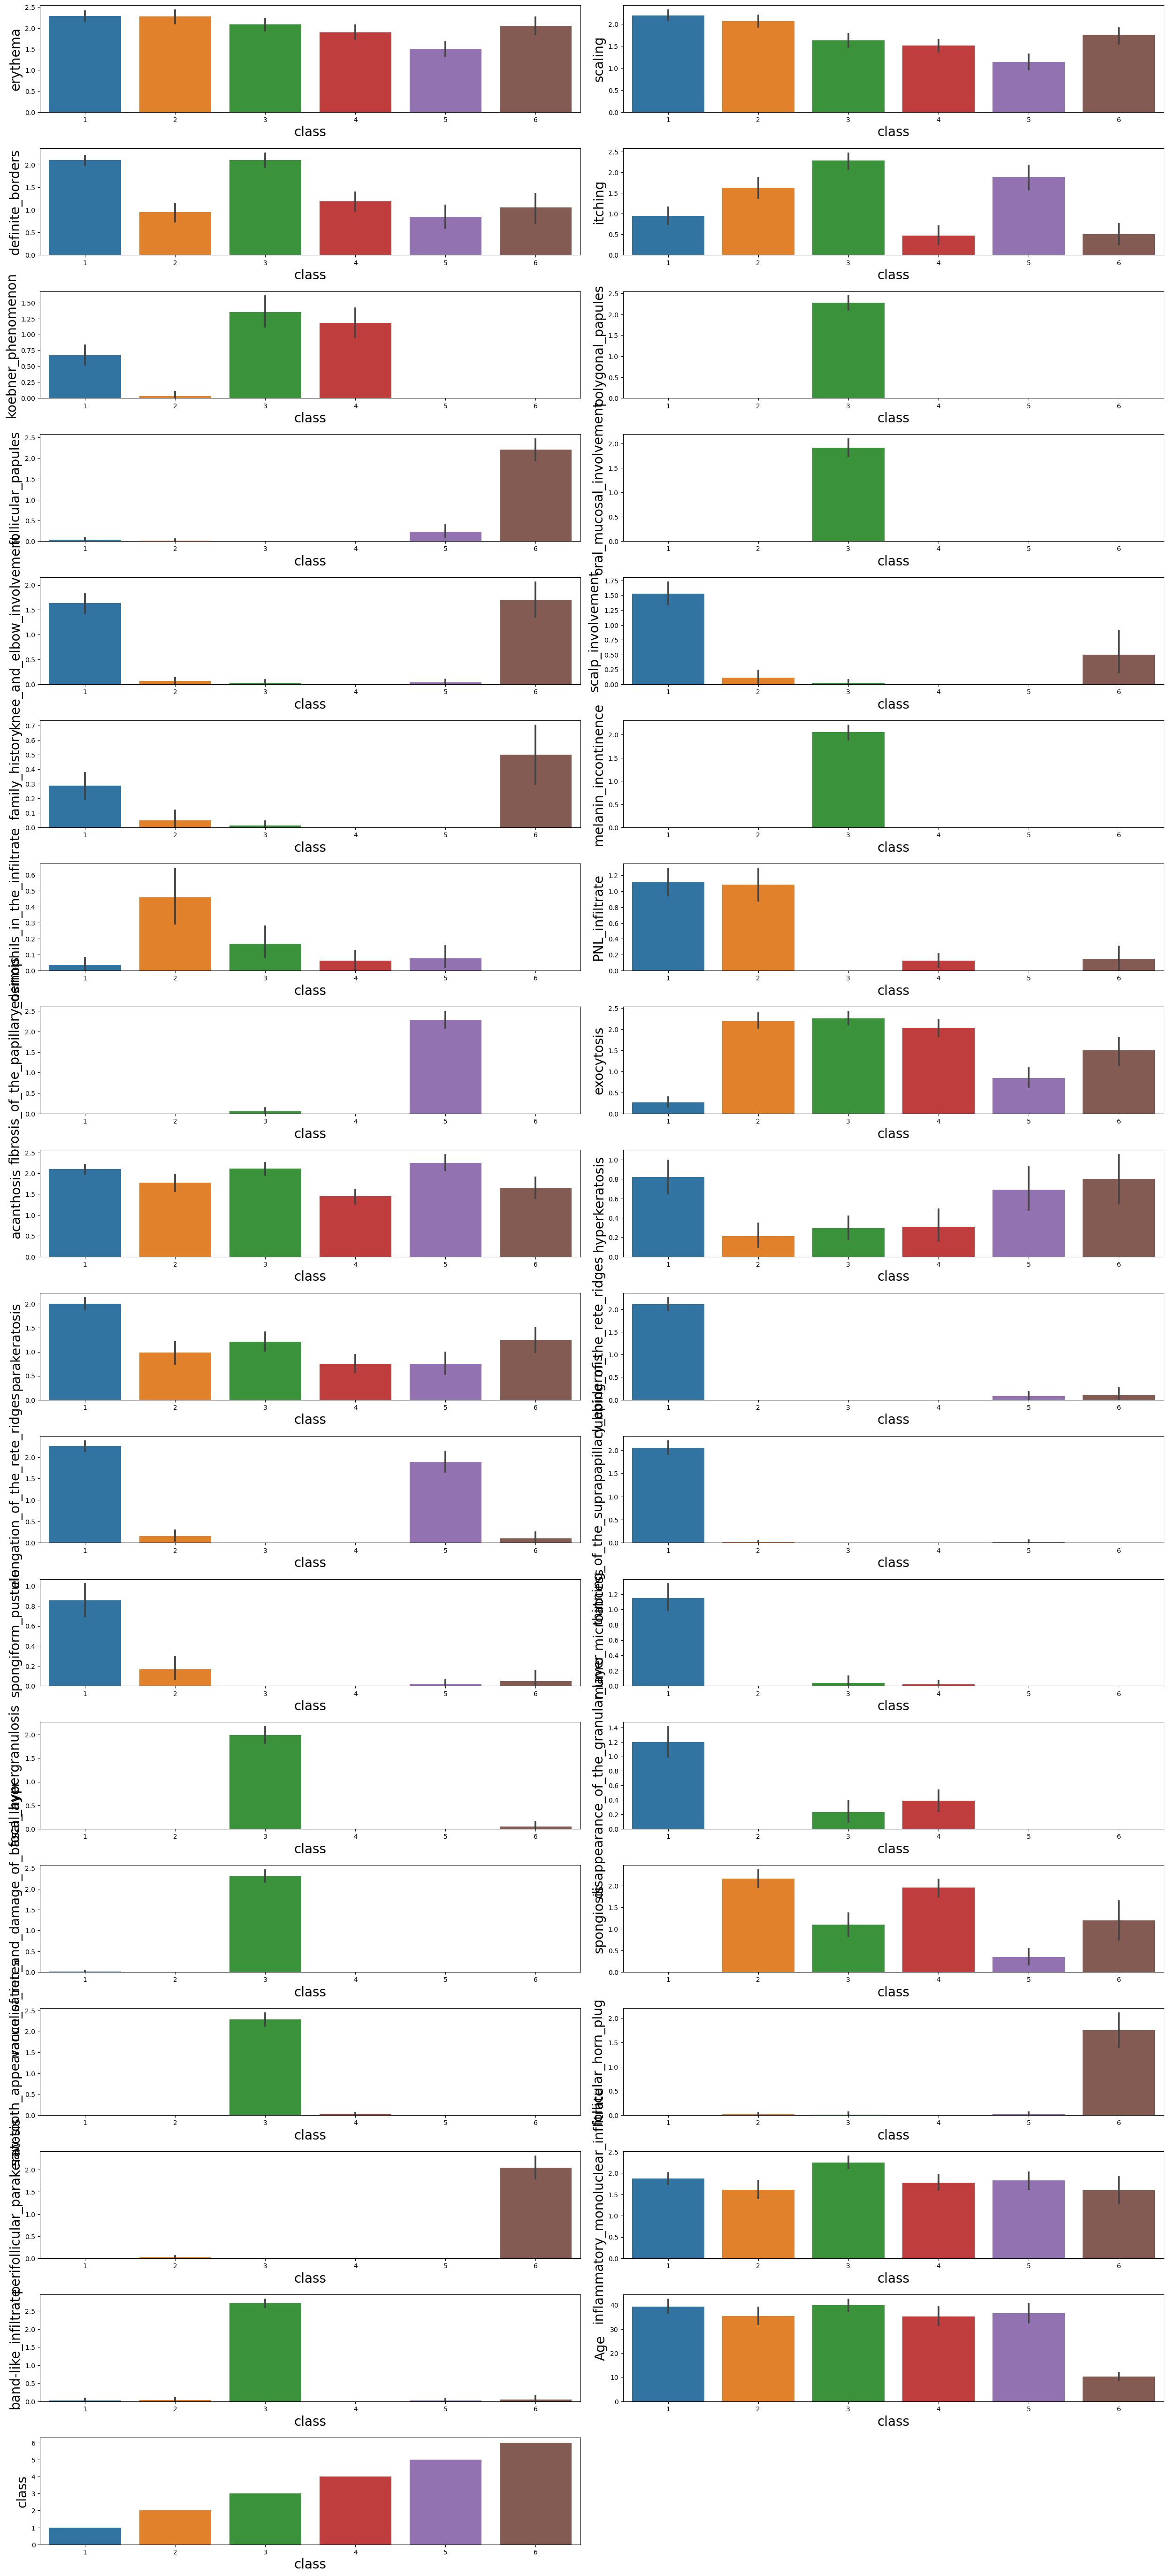

In [31]:
plt.figure(figsize=(25,55),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(18,2,plotnumber)
        sns.barplot(y=data[column],x=data['class'])
        plt.xlabel('class',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [32]:
#insights from above diagram:

#'erythema', 'scaling', 'definite_borders', 'itching', 'exocytosis', 'acanthosis','hyperkeratosis', 'parakeratosis', 'IMI' -are most common features in skin condition,because they are seen in all class of skin disorder.itching is less seen in class 4 and class 6 skin disorder.'exocytosis' is less seen in 'class 1'.
# 'koebner_phenomenon' is seen in class 3 and class 4 and class 1 respectaviely.very less amount of chances seen in class 2.
# 'p_papules','melanin_incontinence','focal_hg','band_inf' and 'sawtooth' symptoms are seen only in class 3 skin disorder
# 'f_papules'and 'horn_plug' symptoms mainly seen in class 6.
# 'oral_mucosal' involvement seen in class 3 while 'knee_elbow' and 'scalp' involvement seen mainly in class 1 and class 6 & less amount in class 2 and class3.
# 'family_history' shows that class 1,class2 and class 6 types skin disorder may transmit in family.
# 'eosinophils_in_the_infiltrate' symptoms seen in class 2 and class 3 respectaviely,but it's not seen in class 6 skin disorder.
# 'PNL_infiltrate'and  'spongiform_pustule' symptoms seen mainly in class 1 and class 2 but it's not seen in class 3 and class 5 skin disorder.
# 'fibrosis_of_the_papillary_dermis' symptom seen in class 5 and very less amount seen in class 3 skin disorder.
# 'clubbing_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis' and 'munro_microabcess' are seen in class 1.
# 'elongation_of_the_rete_ridges' symptoms seen mainly in class 1 and class 5 skin disorder.
# 'disappear_gl' seen in class 1,class3 class 4 skin disorder.
# 'spongiosis' seen in all class except class 1 skin disorder.
# 'horn_plug',and 'pp' seen in only class 6 skin disorder.
# maximum cases seen in class 1 (111) then class 3(71),then class 2(60),class 5(48),class 4(48) and class 6(20).

In [33]:
data.rename(columns={'focal_hypergranulosis': 'focal_hg','disappearance_of_the_granular_layer':'disappear_gl','vacuolisation_and_damage_of_basal_layer':'vaco_n_damage_bl','saw-tooth_appearance_of_retes':'sawtooth','follicular_horn_plug':'horn_plug','perifollicular_parakeratosis':'pp','inflammatory_monoluclear_inflitrate':'IMI','band-like_infiltrate':'band_inf'}, inplace=True)

In [34]:
data.rename(columns={'	koebner_phenomenon':'koebner','polygonal_papules':'p_papules','follicular_papules':'f_papules','oral_mucosal_involvement':'oral_mucosal','knee_and_elbow_involvement':'knee_elbow','scalp_involvement':'scalp'},inplace=True)

In [35]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     p_papules  f_papules  oral_mucosal  knee_elbow  scalp  family_history  \
0            0          0             0           1      0               0   
1            0          0             0           1      1               1   
2            3          0             3           0      0               0   
3            0          0             0           3      2               0   
4            2          0             2           0      0               0   
..         ...        ...           ...         ...    ...             ...   
361          0          0             0           0      0               0   
362          0          0             0           0      0               0   
363          2          0             2           0      0               0   
364          3          0             2           0      0               0   
365          0          0             0           3      3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
0                       0                              0               0   
1                       0                              0               1   
2                       1                              0               0   
3                       0                              0               3   
4                       1                              0               0   
..                    ...                            ...             ...   
361                     0                              0               1   
362                     0                              0               0   
363                     2                              2               0   
364                     2                              0               0   
365                     0                              0               1   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
0                                   0           3           2               0   
1                                   0           1           2               0   
2                                   0           1           2               0   
3                                   0           0           2               0   
4                                   0           1           2               0   
..                                ...         ...         ...             ...   
361                                 0           1           1               0   
362                                 0           2           2               0   
363                                 0           3           3               0   
364                                 0           3           2               0   
365                                 0           0           2               0   

     parakeratosis  clubbing_of_the_rete_ridges  \
0                0                            0   
1                2                            2   
2                2                            0   
3                3                            2   
4                0                            0   

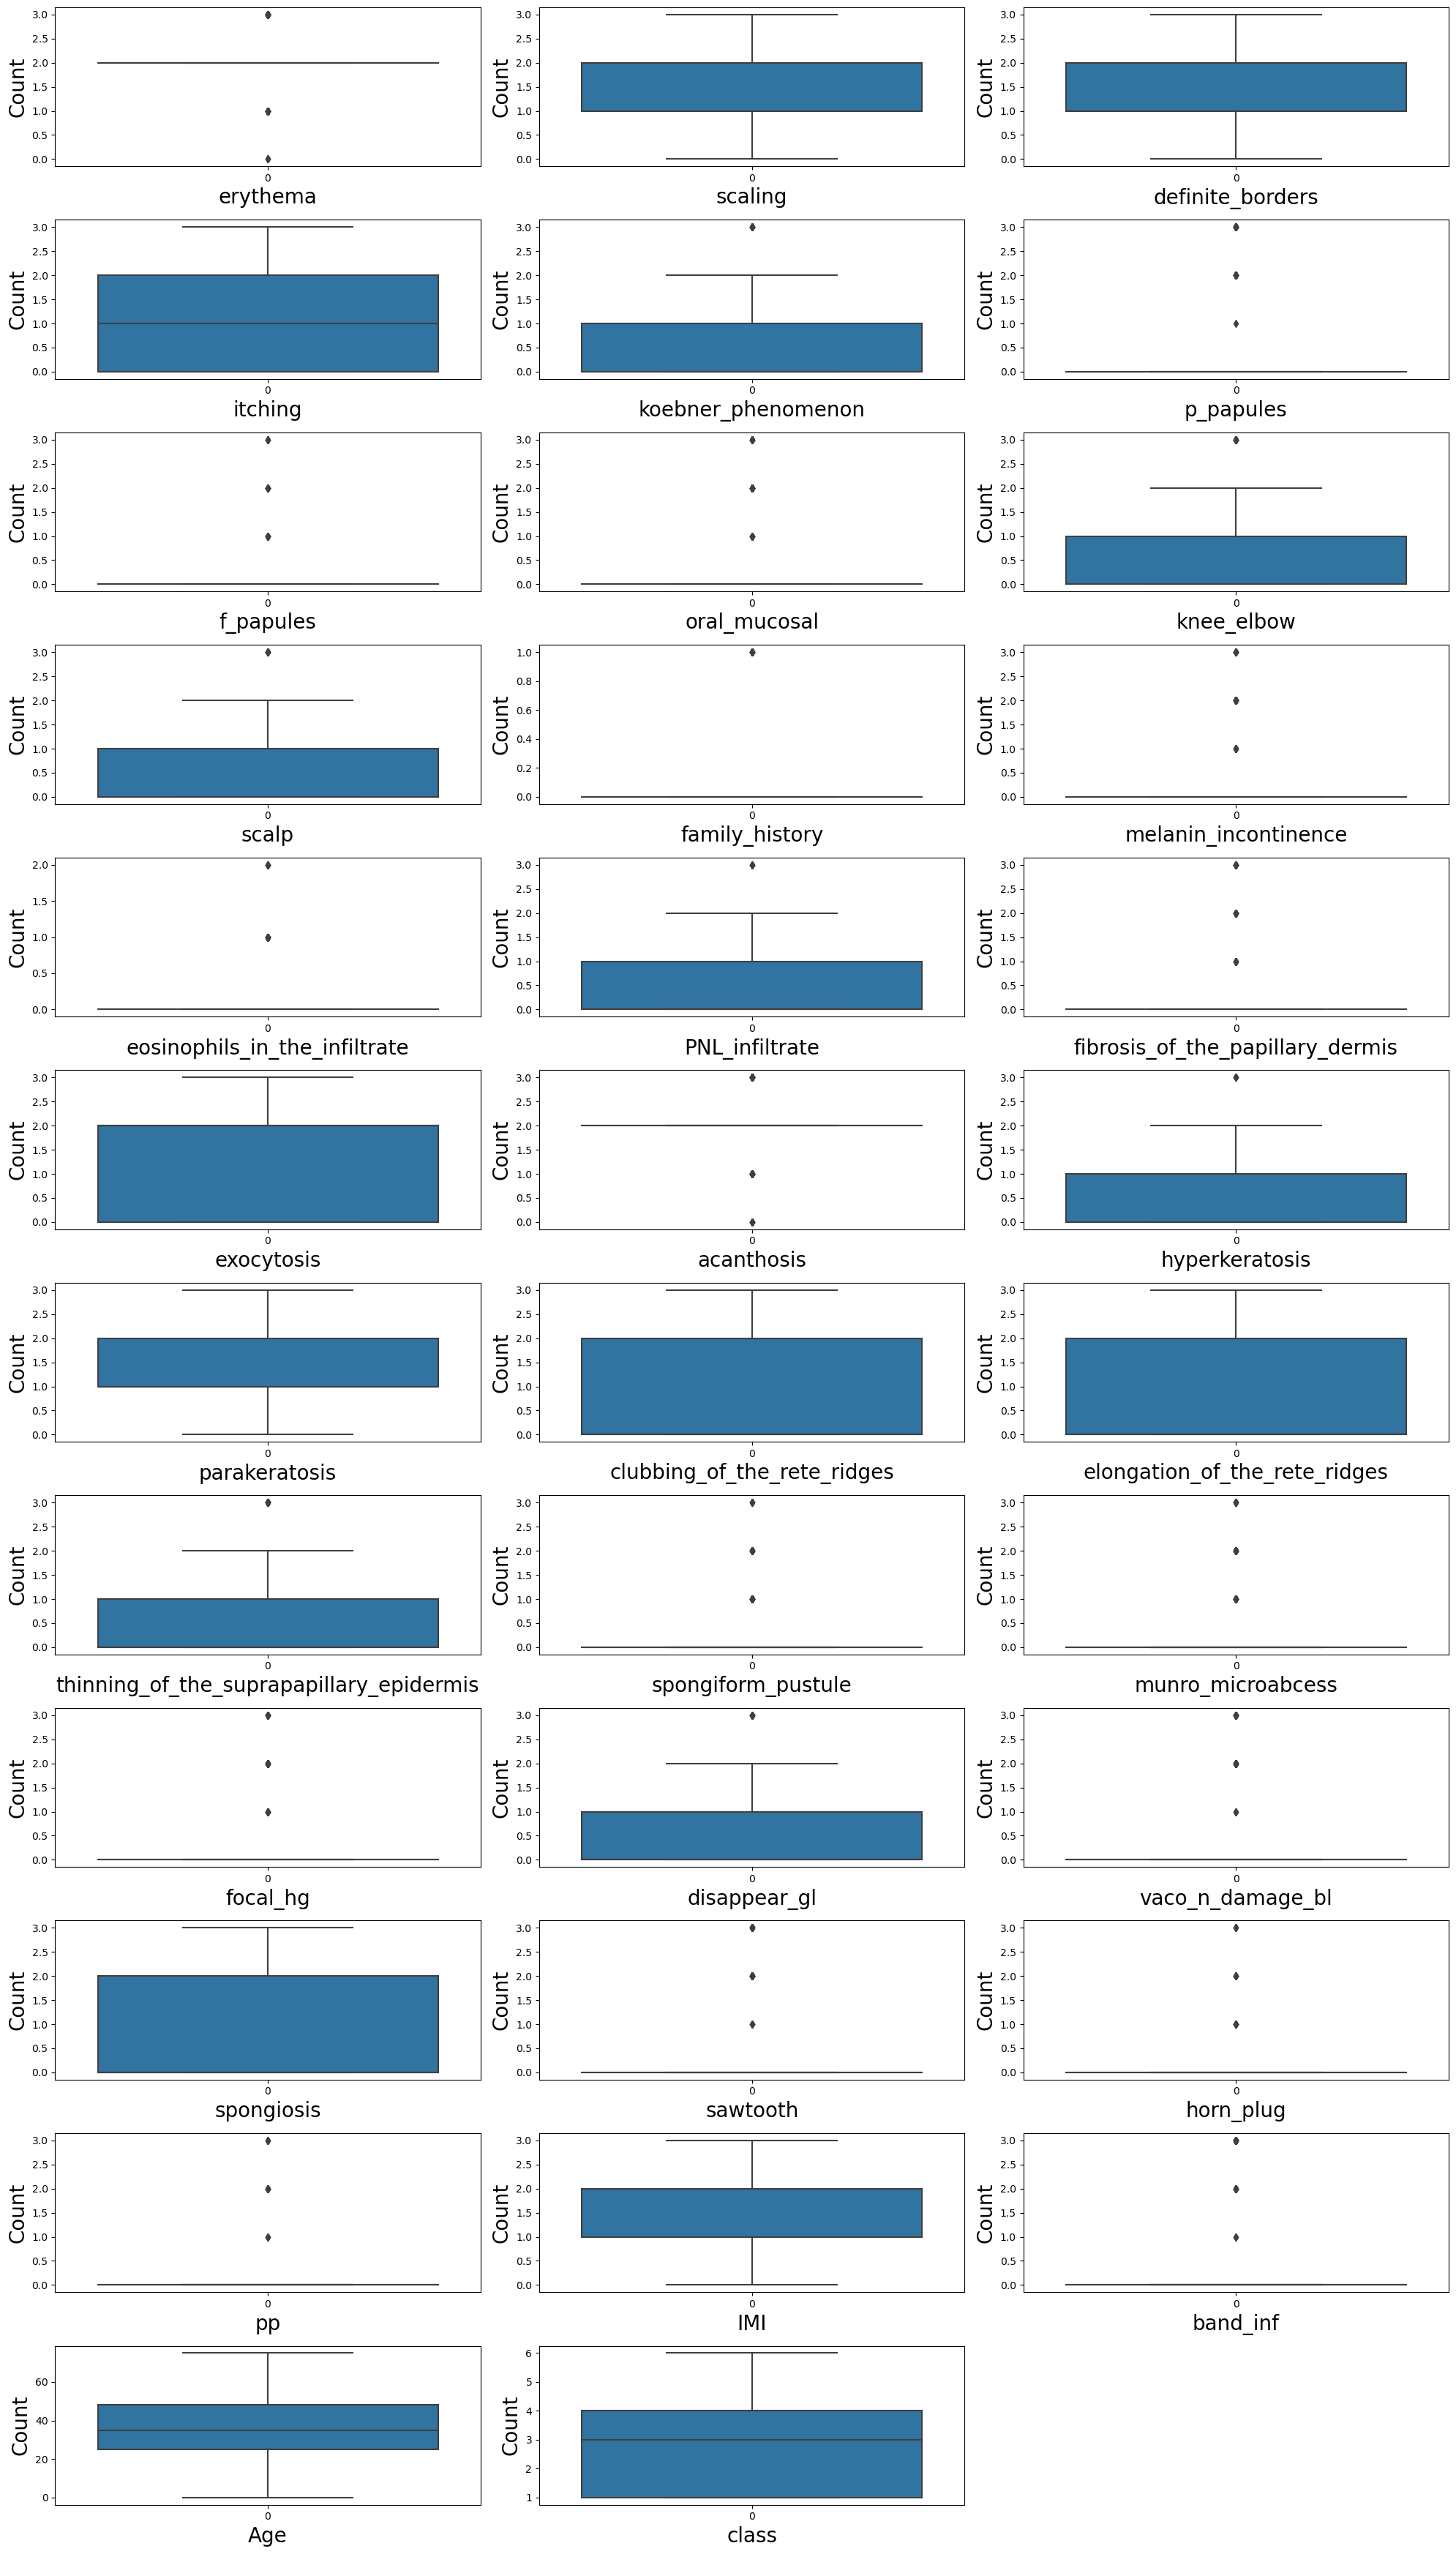

In [36]:
## Checking the outliers
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [37]:
#All data are within the range.

In [38]:
data2=data.corr()
data2

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
p_papules                                 0.033571 -0.075035   
f_papules                                -0.109550 -0.092400   
oral_mucosal                             -0.026810 -0.082969   
knee_elbow                                0.141008  0.298398   
scalp                                     0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.224095  0.282486   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.055432  0.013149   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hg                                 -0.013761 -0.085021   
disappear_gl                              0.159100  0.211484   
vaco_n_damage_bl                          0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
sawtooth                                 -0.005779 -0.114467   
horn_plug                                -0.005450 -0.010518   
pp                                        0.009539 -0.011135   
IMI                                       0.075758 -0.010977   
band_inf                                 -0.006955 -0.132079   
Age                                      -0.003724  0.017285   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
p_papules                                         0.327754  0.409696   
f_papules                                        -0.166662 -0.144825   
oral_mucosal                                      0.286684  0.359163   
knee_elbow                                        0.302309 -0.299645   
scalp                                             0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
PNL_infiltrate                                    0.041330 -0.145288   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.043894 -0.008460   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

<Axes: >

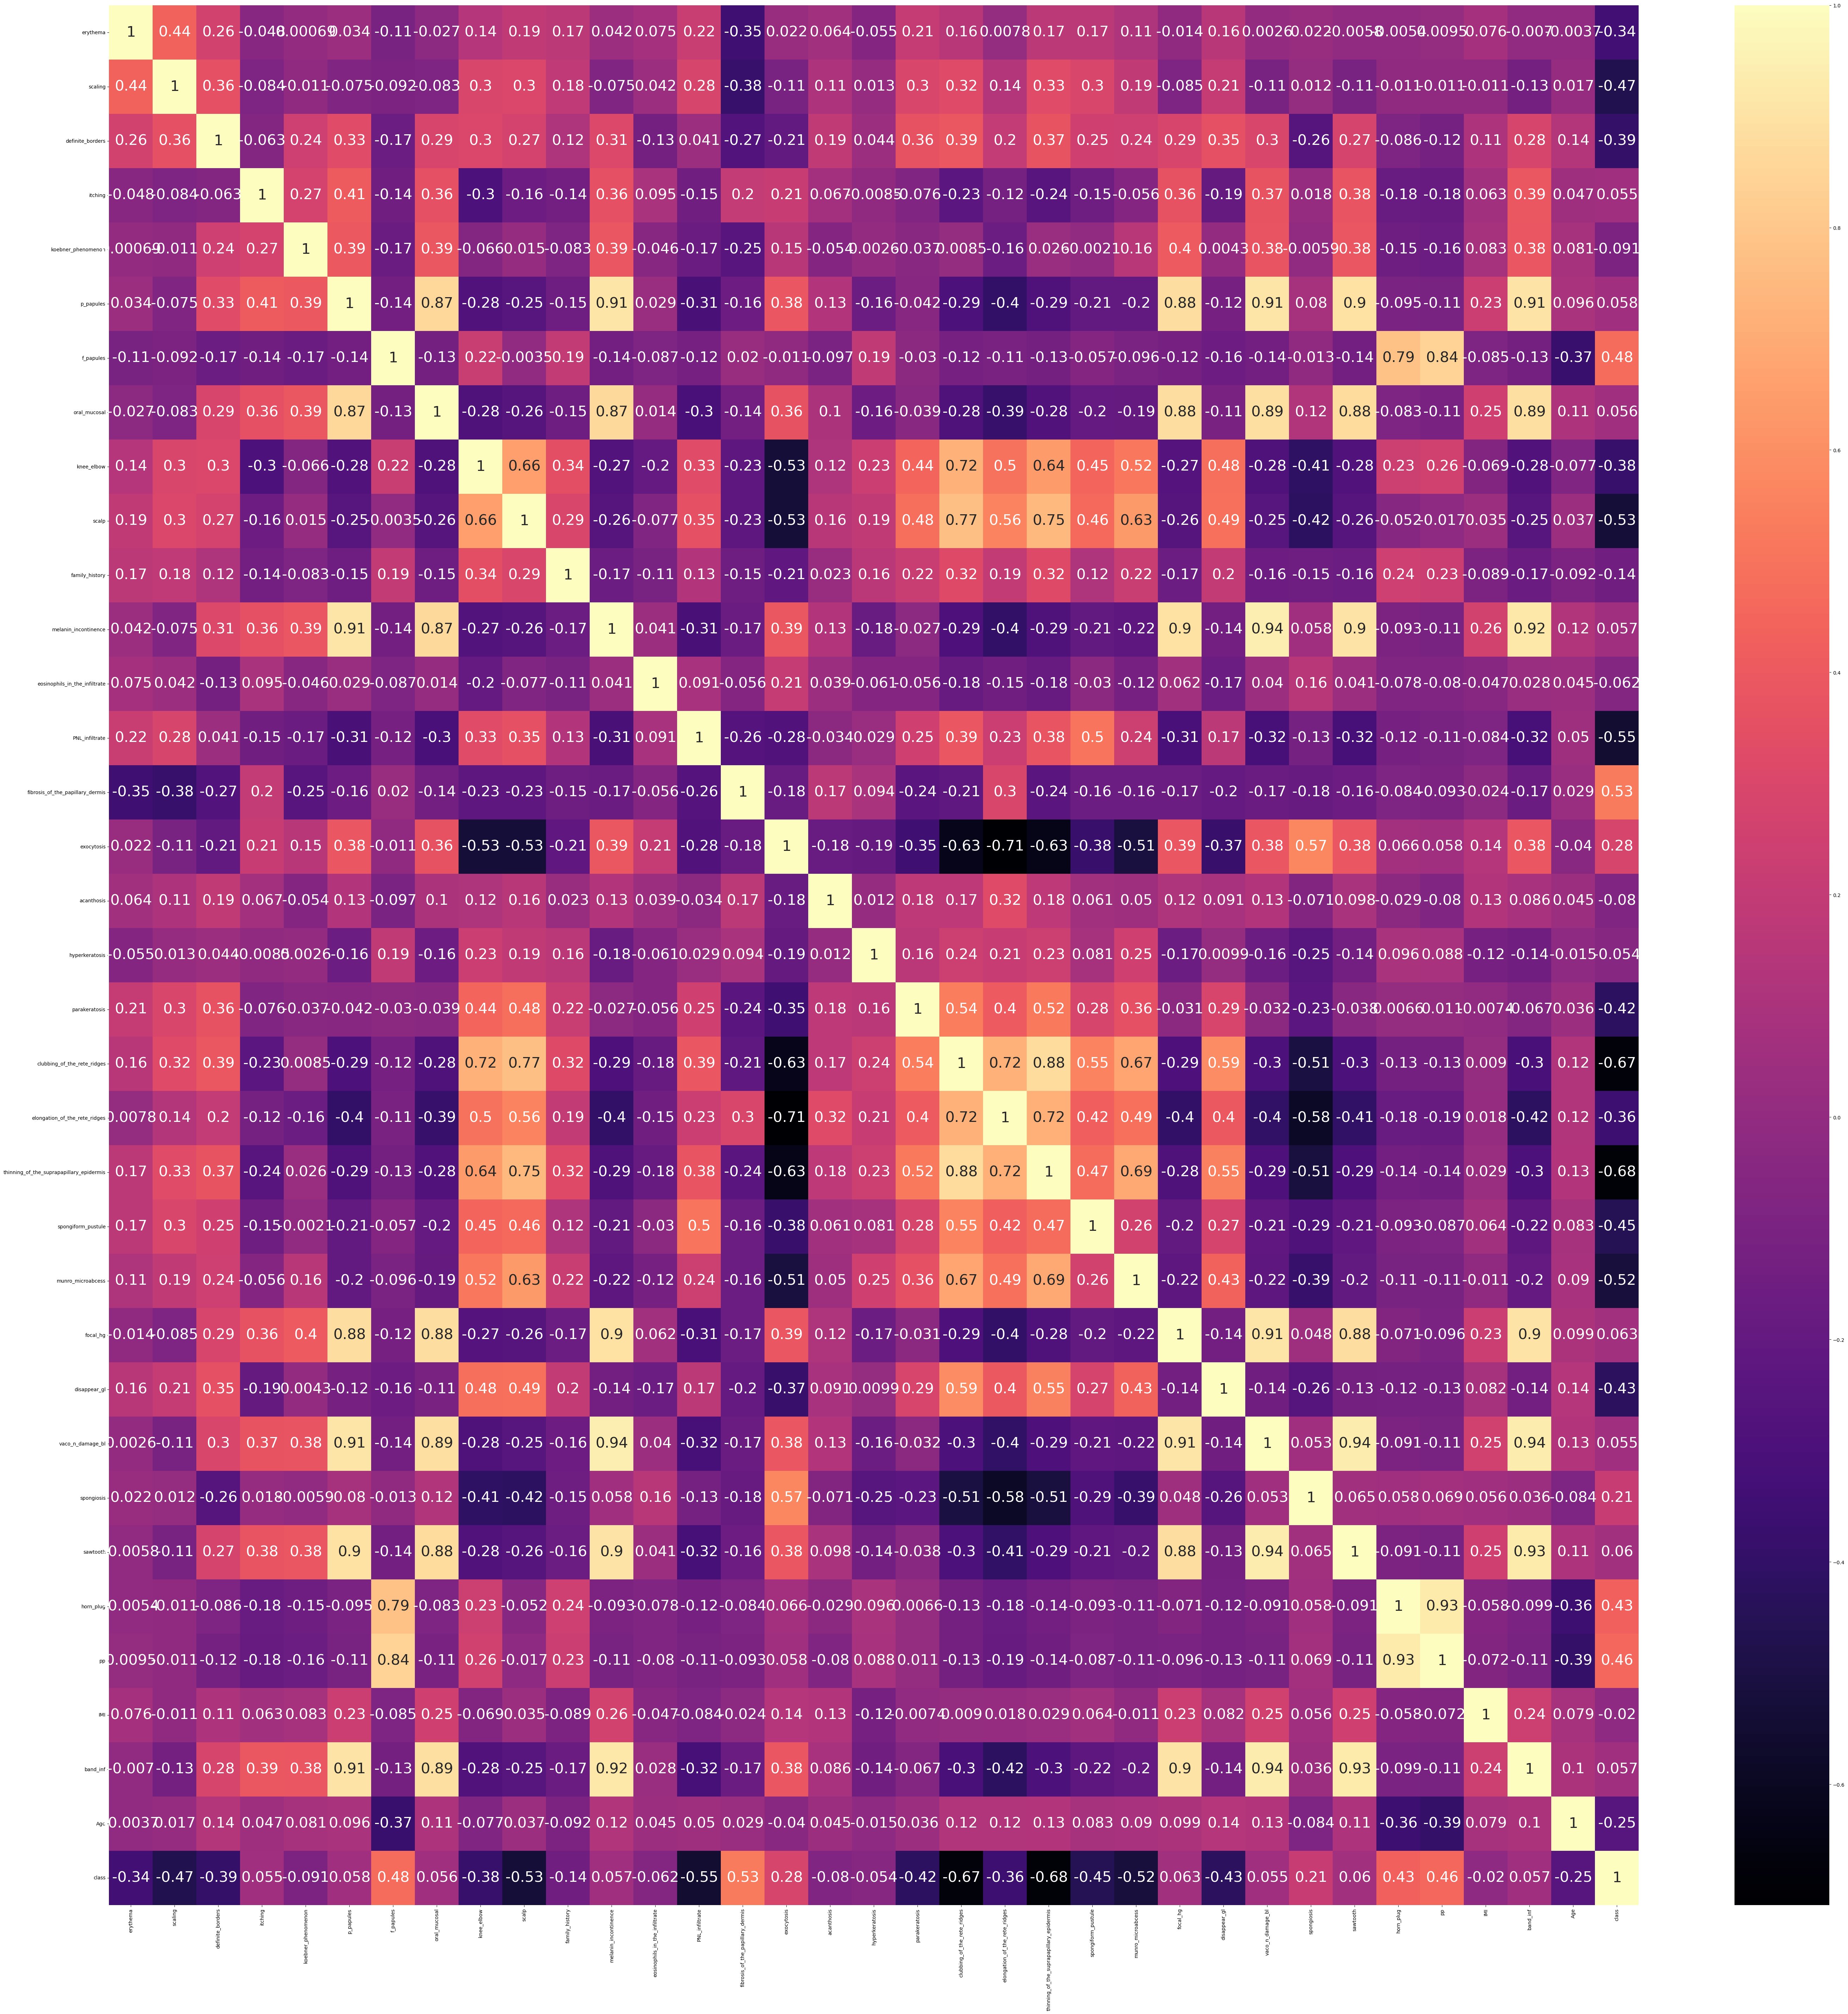

In [39]:
## Checking correlation
plt.figure(figsize=(70, 70))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="magma", annot_kws={"size":30})


In [40]:
#co-relation
#1p_papules---focal_hg=0.8
#2)p_papules---vaco_n_damage_bl=0.9
#3)p_papules---sawtooth=0.89
#4)p_papules---band_inf=0.9
#5)horn_plug---pp=0.92
#6)f_papules---pp=0.84
#7)focal_hg---vaco_n_damage=0.9
#8)focal_hg---sawtooth=0.88
#9)focal_hg---band_inf=0.9
#10)vaco_n_damage---sawtooth=0.93
#11)vaco_n_damage---band_inf=0.93
#12)saw_tooth---band_inf=0.92



# above all are highly positive corelated
# remember to check Age factor also.

#decided to drop band_inf,horn_plug,sawtooth,vaco_n_damage
#           loc p_papules,f_papules,pp,focal_hg


In [41]:
#data3=data.loc[::,['erythema','scaling','definite_borders','itching','koebner_phenomenon','p_papules','f_papules','focal_hg','disappear_gl','spongiosis','pp','IMI','Age']]
data3=data.loc[::,['erythema','scaling','definite_borders','itching','koebner_phenomenon','p_papules','f_papules','family_history','eosinophils_in_the_infiltrate','PNL_infiltrate','fibrosis_of_the_papillary_dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing_of_the_rete_ridges','elongation_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis','spongiform_pustule','munro_microabcess','focal_hg','disappear_gl','spongiosis','pp','IMI','Age','oral_mucosal','knee_elbow','scalp']]

data3

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     p_papules  f_papules  family_history  eosinophils_in_the_infiltrate  \
0            0          0               0                              0   
1            0          0               1                              0   
2            3          0               0                              0   
3            0          0               0                              0   
4            2          0               0                              0   
..         ...        ...             ...                            ...   
361          0          0               0                              0   
362          0          0               0                              0   
363          2          0               0                              2   
364          3          0               0                              0   
365          0          0               0                              0   

     PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
0                 0                                 0           3           2   
1                 1                                 0           1           2   
2                 0                                 0           1           2   
3                 3                                 0           0           2   
4                 0                                 0           1           2   
..              ...                               ...         ...         ...   
361               1                                 0           1           1   
362               0                                 0           2           2   
363               0                                 0           3           3   
364               0                                 0           3           2   
365               1                                 0           0           2   

     hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
0                 0              0                            0   
1                 0              2                            2   
2                 0              2                            0   
3                 0              3                            2   
4                 0              0                            0   
..              ...            ...                          ...   
361               0              0                            0   
362               0              0                            0   
363               0              0                            0   
364               0              0                            0   
365               0              2                            3   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
0                                0                                         0   
1                                2                                         2   
2                                0                                         0   
3                                2                                         2   
4                                0   

<Axes: >

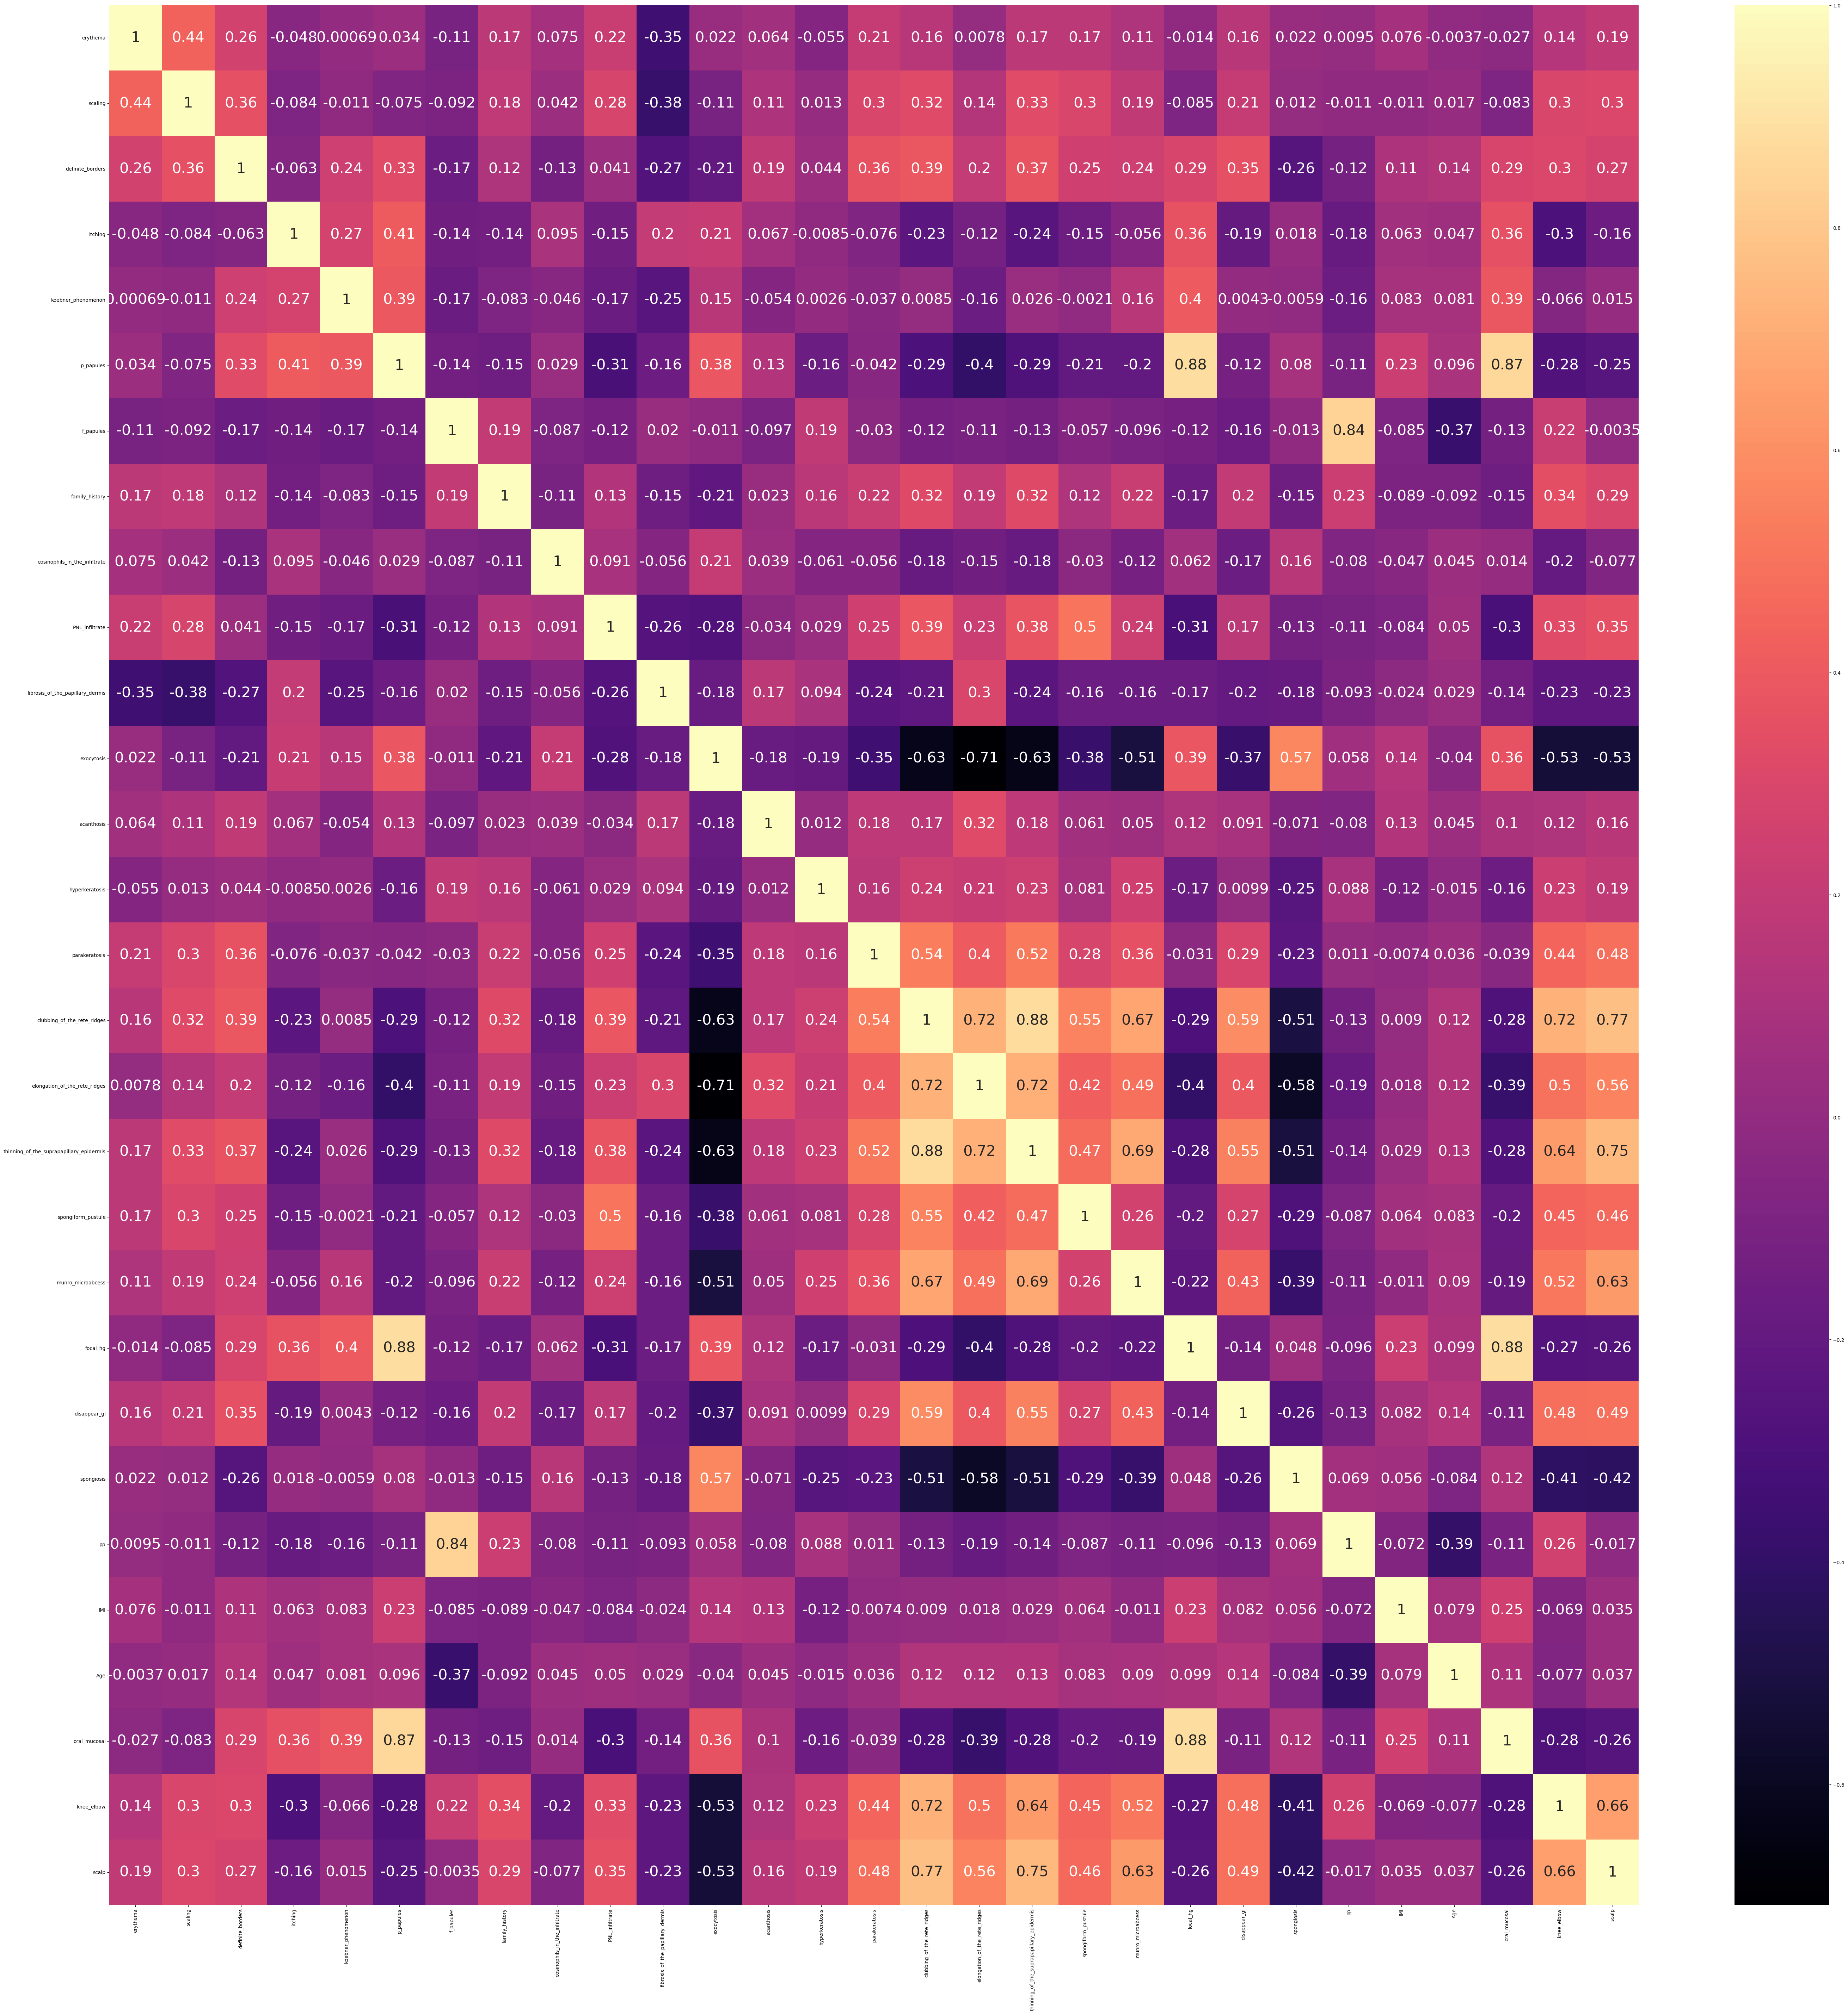

In [42]:
plt.figure(figsize=(70, 70))#canvas size
sns.heatmap(data3.corr(), annot=True, cmap="magma", annot_kws={"size":30})

In [43]:
data3.shape

(366, 29)

In [44]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler() #Object Creation
data3[['Age']]=scale.fit_transform(data[['Age']])

In [45]:
data3

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     p_papules  f_papules  family_history  eosinophils_in_the_infiltrate  \
0            0          0               0                              0   
1            0          0               1                              0   
2            3          0               0                              0   
3            0          0               0                              0   
4            2          0               0                              0   
..         ...        ...             ...                            ...   
361          0          0               0                              0   
362          0          0               0                              0   
363          2          0               0                              2   
364          3          0               0                              0   
365          0          0               0                              0   

     PNL_infiltrate  fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
0                 0                                 0           3           2   
1                 1                                 0           1           2   
2                 0                                 0           1           2   
3                 3                                 0           0           2   
4                 0                                 0           1           2   
..              ...                               ...         ...         ...   
361               1                                 0           1           1   
362               0                                 0           2           2   
363               0                                 0           3           3   
364               0                                 0           3           2   
365               1                                 0           0           2   

     hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
0                 0              0                            0   
1                 0              2                            2   
2                 0              2                            0   
3                 0              3                            2   
4                 0              0                            0   
..              ...            ...                          ...   
361               0              0                            0   
362               0              0                            0   
363               0              0                            0   
364               0              0                            0   
365               0              2                            3   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
0                                0                                         0   
1                                2                                         2   
2                                0                                         0   
3                                2                                         2   
4                                0   

In [46]:
#Model Creation

In [47]:
## Creating independent and dependent variable
x = data3 #independent variable 
y= data.loc[::,['class']] #dependent variable
#x=preprocessing.scale(x)

In [48]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print("Actual:",Counter(y))# checking count for each class 
print(y.value_counts())
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print("Smote:",Counter(y_sm))# checking count after sampling for  each class
print(y_sm.value_counts())

Actual: Counter({'class': 1})
class
1        112
3         72
2         61
5         52
4         49
6         20
dtype: int64
Smote: Counter({'class': 1})
class
1        112
2        112
3        112
4        112
5        112
6        112
dtype: int64


In [49]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=11)

# LogisticRegression

In [50]:
##  Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)  ## training

C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
## Step 4 Prediction
y_pred=clf.predict(x_test)

In [52]:
y_pred

array([6, 5, 1, 5, 3, 1, 4, 2, 4, 4, 2, 6, 6, 3, 6, 2, 2, 3, 3, 4, 6, 2,
       5, 1, 5, 3, 1, 6, 4, 5, 3, 3, 4, 6, 1, 4, 3, 1, 1, 1, 5, 3, 6, 2,
       4, 6, 1, 4, 1, 2, 3, 1, 1, 3, 4, 2, 2, 5, 4, 4, 5, 2, 2, 6, 6, 2,
       2, 6, 1, 1, 1, 5, 2, 3, 6, 5, 1, 4, 6, 2, 3, 1, 1, 3, 1, 3, 3, 3,
       4, 5, 3, 4, 5, 4, 3, 1, 3, 1, 5, 2, 6, 6, 1, 5, 2, 4, 2, 3, 3, 2,
       4, 5, 4, 6, 3, 2, 1, 4, 1, 5, 4, 2, 2, 6, 6, 2, 5, 4, 6, 2, 6, 6,
       1, 3, 6, 4, 1, 4, 3, 5, 3, 4, 1, 5, 4, 3, 2, 5, 5, 2, 5, 2, 5, 5,
       6, 3, 5, 2, 5, 3, 5, 3, 3, 2, 5, 1, 4, 5], dtype=int64)

In [53]:
y_pred_prob=clf.predict_proba(x_test)


In [54]:
y_pred_prob

array([[3.87187891e-05, 1.30734697e-04, 3.04445956e-05, 2.05830468e-04,
        8.41024762e-05, 9.99510169e-01],
       [1.02331164e-04, 1.53930940e-05, 9.25609836e-06, 1.78378386e-07,
        9.99869737e-01, 3.10409984e-06],
       [9.99926517e-01, 1.13257884e-06, 6.85985857e-06, 1.34537194e-05,
        8.16210548e-06, 4.38746657e-05],
       ...,
       [9.99974555e-01, 3.42872800e-08, 2.51169105e-06, 2.03870538e-06,
        1.53510791e-05, 5.50926798e-06],
       [4.13303764e-05, 2.47695573e-04, 2.51413490e-04, 9.98793740e-01,
        3.23906420e-04, 3.41913895e-04],
       [9.20068533e-03, 1.88500034e-03, 7.52202099e-03, 5.98287134e-02,
        9.15203319e-01, 6.36026138e-03]])

In [55]:
x_test.shape

(168, 29)

In [56]:
#Evaluation of Model

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [58]:

cm=confusion_matrix(y_test,y_pred)
print(cm)


[[28  0  0  0  0  0]
 [ 0 29  0  1  0  0]
 [ 0  0 31  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 29  0]
 [ 0  0  0  0  0 24]]


In [59]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.9940476190476191

In [60]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.9942680776014109

In [61]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.9940533296785297

In [62]:
cr=classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        31
           4       0.96      1.00      0.98        26
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        24

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



In [63]:
y_test.value_counts()

class
3        31
2        30
5        29
1        28
4        26
6        24
dtype: int64

# DecisionTree classifier

In [64]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print("Actual:",Counter(y))# checking count for each class 
print(y.value_counts())
x_sm,y_sm=sm.fit_resample(x,y)#applying sampling on target variable 
print("Smote:",Counter(y_sm))# checking count after sampling for  each class
print(y_sm.value_counts())

Actual: Counter({'class': 1})
class
1        112
3         72
2         61
5         52
4         49
6         20
dtype: int64
Smote: Counter({'class': 1})
class
1        112
2        112
3        112
4        112
5        112
6        112
dtype: int64


In [65]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=11)

In [66]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_hat=dt.predict(x_test)#prediction
y_hat#predicted values 

array([6, 5, 1, 5, 3, 1, 4, 4, 4, 4, 2, 6, 6, 3, 6, 2, 2, 3, 3, 4, 6, 4,
       5, 1, 5, 3, 1, 6, 4, 5, 3, 3, 4, 6, 1, 4, 3, 1, 1, 1, 5, 3, 6, 2,
       4, 6, 1, 4, 1, 2, 3, 1, 1, 3, 4, 2, 4, 5, 4, 4, 5, 2, 2, 6, 6, 2,
       2, 6, 1, 1, 1, 5, 2, 3, 6, 5, 1, 4, 6, 2, 3, 1, 4, 3, 1, 3, 3, 3,
       4, 5, 3, 4, 5, 4, 3, 1, 3, 1, 5, 2, 2, 6, 1, 5, 2, 4, 2, 3, 3, 2,
       4, 5, 4, 6, 3, 2, 1, 4, 1, 5, 4, 2, 2, 6, 6, 4, 5, 4, 6, 2, 6, 6,
       1, 3, 6, 4, 1, 4, 3, 5, 3, 4, 1, 5, 4, 3, 2, 5, 5, 2, 5, 2, 5, 5,
       6, 3, 5, 2, 5, 3, 5, 3, 3, 2, 5, 1, 4, 5], dtype=int64)

In [67]:
y_train_predict=dt.predict(x_train)#predicting training data to check training performance 
y_train_predict #predicted values for your training data

array([1, 1, 6, 3, 6, 4, 1, 1, 6, 4, 6, 2, 4, 5, 6, 1, 6, 5, 5, 5, 3, 4,
       3, 3, 1, 1, 3, 6, 4, 6, 5, 5, 6, 4, 3, 6, 5, 4, 3, 5, 5, 4, 4, 4,
       3, 3, 6, 2, 1, 2, 6, 2, 3, 6, 1, 2, 6, 3, 4, 2, 6, 2, 6, 6, 1, 3,
       1, 4, 4, 6, 5, 2, 3, 3, 2, 6, 1, 1, 6, 5, 3, 5, 4, 3, 6, 5, 5, 1,
       6, 5, 5, 4, 3, 6, 2, 1, 3, 1, 6, 2, 2, 5, 3, 4, 5, 2, 4, 3, 5, 1,
       5, 5, 6, 5, 6, 5, 4, 1, 6, 3, 4, 2, 1, 2, 3, 5, 6, 5, 1, 6, 2, 3,
       2, 3, 1, 5, 4, 5, 3, 6, 4, 2, 3, 6, 4, 5, 5, 2, 1, 2, 5, 3, 2, 2,
       5, 1, 3, 1, 5, 4, 1, 4, 5, 3, 4, 3, 2, 5, 5, 3, 5, 6, 3, 5, 1, 4,
       2, 6, 4, 2, 5, 3, 1, 3, 1, 5, 1, 1, 3, 6, 2, 1, 2, 3, 6, 4, 3, 2,
       6, 4, 2, 4, 2, 5, 4, 2, 3, 1, 5, 6, 4, 6, 2, 1, 4, 4, 5, 1, 3, 4,
       2, 5, 2, 2, 5, 4, 4, 4, 5, 1, 6, 6, 1, 4, 2, 4, 4, 6, 6, 1, 3, 2,
       5, 2, 2, 5, 1, 1, 4, 6, 1, 1, 2, 2, 5, 5, 6, 5, 3, 1, 1, 1, 5, 4,
       3, 5, 6, 1, 2, 6, 4, 3, 1, 2, 5, 4, 4, 6, 5, 2, 4, 1, 2, 6, 3, 1,
       1, 5, 6, 1, 6, 4, 4, 4, 3, 5, 4, 1, 6, 4, 1,

In [68]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

1.0

In [69]:
confusion_matrix(y_train, y_train_predict)

array([[84,  0,  0,  0,  0,  0],
       [ 0, 82,  0,  0,  0,  0],
       [ 0,  0, 81,  0,  0,  0],
       [ 0,  0,  0, 86,  0,  0],
       [ 0,  0,  0,  0, 83,  0],
       [ 0,  0,  0,  0,  0, 88]], dtype=int64)

In [70]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00        81
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        88

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



In [71]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc
# become less with 16 column and age scale

0.9583333333333334

In [72]:
test_f1score=f1_score(y_test,y_hat,average='weighted')
test_f1score
#same here

0.9587876780139123

In [73]:
test_recallscore=recall_score(y_test,y_hat,average='weighted')
test_recallscore
#same here

0.9583333333333334

In [74]:
test_precisionscore=precision_score(y_test,y_hat,average='weighted')
test_precisionscore
#same

0.964114010989011

In [75]:
confusion_matrix(y_test, y_hat)

array([[27,  0,  0,  1,  0,  0],
       [ 0, 25,  0,  5,  0,  0],
       [ 0,  0, 31,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0, 29,  0],
       [ 0,  1,  0,  0,  0, 23]], dtype=int64)

In [76]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        28
           2       0.96      0.83      0.89        30
           3       1.00      1.00      1.00        31
           4       0.81      1.00      0.90        26
           5       1.00      1.00      1.00        29
           6       1.00      0.96      0.98        24

    accuracy                           0.96       168
   macro avg       0.96      0.96      0.96       168
weighted avg       0.96      0.96      0.96       168



In [77]:
# Grid search cv

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [80]:
#fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Bestparamters: ({'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})

In [81]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [82]:
tree_cv.best_score_#getting best score form cv

nan

In [83]:
dt1=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 10, min_samples_split= 10, splitter='best')

In [84]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10)

In [85]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([6, 5, 1, 5, 3, 1, 4, 4, 4, 4, 2, 6, 6, 3, 6, 2, 2, 3, 3, 4, 6, 4,
       5, 1, 5, 3, 1, 6, 4, 5, 3, 3, 4, 6, 1, 4, 3, 1, 1, 1, 5, 3, 6, 2,
       4, 6, 1, 4, 1, 2, 3, 1, 1, 3, 4, 2, 4, 5, 4, 4, 5, 2, 2, 6, 6, 2,
       2, 6, 1, 1, 1, 5, 2, 3, 6, 5, 1, 4, 6, 2, 3, 1, 4, 3, 1, 3, 3, 3,
       4, 5, 3, 4, 5, 4, 3, 1, 5, 1, 5, 2, 6, 6, 1, 5, 2, 4, 2, 3, 3, 2,
       4, 5, 4, 6, 3, 2, 1, 2, 1, 5, 4, 2, 2, 6, 6, 4, 5, 4, 6, 2, 6, 6,
       1, 3, 6, 4, 1, 4, 3, 5, 3, 4, 1, 5, 4, 3, 2, 5, 5, 2, 5, 2, 5, 5,
       6, 3, 5, 2, 5, 3, 5, 3, 3, 2, 5, 1, 4, 5], dtype=int64)

In [86]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

0.9523809523809523

In [87]:
recall_test=recall_score(y_test,y_hat1,average='weighted')
recall_test

0.9523809523809523

In [88]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        28
           2       0.96      0.83      0.89        30
           3       1.00      0.97      0.98        31
           4       0.81      0.96      0.88        26
           5       0.97      1.00      0.98        29
           6       1.00      1.00      1.00        24

    accuracy                           0.95       168
   macro avg       0.96      0.95      0.95       168
weighted avg       0.96      0.95      0.95       168



 # RandomForestClassifier


In [90]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_train,y_train)

C:\Users\suchi joshi\AppData\Local\Temp\ipykernel_2608\2573131905.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train,y_train)


RandomForestClassifier()

In [91]:
y_predict=rf_clf.predict(x_test)

In [92]:
recall=recall_score(y_test,y_predict,average='weighted')
recall

0.9821428571428571

In [93]:

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      0.90      0.95        30
           3       1.00      1.00      1.00        31
           4       0.93      1.00      0.96        26
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        24

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



In [94]:
f_Score=f1_score(y_test,y_predict,average='weighted')
f_Score

0.9819456047526223

#  KNeighborsClassifier

In [100]:
from sklearn.neighbors import KNeighborsClassifier
x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)


In [101]:
k_values = range(1, 21)  # Adjust the range as needed

best_k = None
best_accuracy = 0.0

# Loop through different k values
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this k value results in better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")

C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Best k value: 8


In [102]:
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [103]:
knn_classifier.fit(x_train, y_train)

C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [104]:
y_pred = knn_classifier.predict(x_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9565217391304348


In [106]:
cr_knn=classification_report(y_test,y_pred)
print(cr_knn)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.86      1.00      0.93        19
           3       1.00      1.00      1.00        18
           4       0.92      0.92      0.92        12
           5       1.00      0.88      0.93        16
           6       1.00      1.00      1.00         4

    accuracy                           0.96        92
   macro avg       0.96      0.96      0.96        92
weighted avg       0.96      0.96      0.96        92



In [107]:

recall=recall_score(y_test,y_pred,average='weighted')
recall

0.9565217391304348

# svm model

In [109]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_sm, y_sm) #Training 

C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [110]:
# Predict output for X_test
y_hat=svclassifier.predict(x_test)

C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [111]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.9021739130434783

In [112]:

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.88      0.91      0.89        23
           2       0.82      0.95      0.88        19
           3       1.00      1.00      1.00        18
           4       0.90      0.75      0.82        12
           5       0.94      1.00      0.97        16
           6       1.00      0.25      0.40         4

    accuracy                           0.90        92
   macro avg       0.92      0.81      0.83        92
weighted avg       0.91      0.90      0.89        92



In [113]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat,average='weighted')
print(f1)
recall=recall_score(y_test,y_hat,average='weighted')
print(recall)

0.8931462136082969
0.9021739130434783


In [114]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=6,scoring='accuracy')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.98360656 0.96721311 1.         0.90163934 1.         0.90163934]
Cross validation Score: 0.959016393442623
Std : 0.042062306880712164


C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suchi joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [115]:
#task 2:machine learning model:
# we have apply logistric regression,decision tree classifier,randomforest classifier,knn and svm machine learning model.
# we decided to finalize the logistic regression model as it's gives us a highest accuracy and recall score among all model.


In [116]:
# task 3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

# 'erythema', 'scaling', 'definite_borders', 'itching', 'exocytosis', 'acanthosis','hyperkeratosis', 'parakeratosis', 'IMI'-this symptoms are seen in all types of skin disease.so ,we can say that these are the common symptoms in skin disorder.
# class 1 type of skin disease is most common in compare to other disease.
#if a patient has symptoms of 'clubbing_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis' and 'munro_microabcess' with common symptoms,there may be a more chances to have class 1 type of skin disease.
# if a patient has symptoms of 'p_papules'\'melanin_incontinence'\'focal_hg'\'band_inf' or 'sawtooth' with common symptoms,there may be a more chances to have class 3 type of skin disease And class 3 seen mainly have oral-mocosal involvement.
# if a patient has symptoms of elongation_of_the_rete_ridges' with other common symptoms,then there may be a more chances to have class1 or class5 type of skin disease. 
# if a patient has symptoms of 'f_papules'and 'horn_plug' /'pp' with common symptoms,there may be a more chances to have class 6 type of skin disease.
# if a patient has a positive family history with common symptoms,there may be a chances to have class1 or class 2 or class 6 type of skin disease.
